In [32]:
import librosa
from librosa.feature.utils import delta
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import glob
import numpy as np
import os
import IPython.display as ipd
import scipy as sc

In [33]:
# directory for files
os.chdir("C:/Users/adelu/Documents/UZH/Thesis/")
data_dir = "Shared_CallFiles/meerkats/CC/CC_IndividualityWholeGroups_BW/CutAudio_CC_IndividualityWholeGroups_BW/1_Raw/"

audio_files = glob.glob(data_dir + "*")
print(len(audio_files))

# indvidual names from file
ind_name = []
for i in audio_files:
    ind_name.append(i.split("\\")[-1].split("_")[0])
print(ind_name[0])

377
VBBF083


In [34]:
signal, sr = librosa.load(audio_files[0], sr=None)
time = np.arange(0, len(signal)) / sr

**Example Signal**

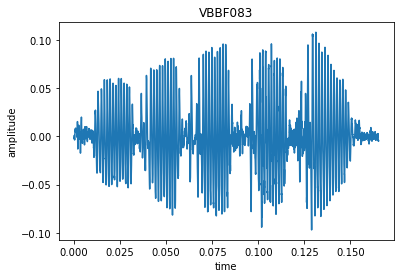

In [19]:
plt.plot(time, signal)
plt.xlabel("time")
plt.ylabel("amplitude")
plt.title(ind_name[0])

ipd.Audio(audio_files[0])

Load all calls

In [35]:
%%time
# how long to load all files?

signals = []
srs = []
times = []

for i in range(len(audio_files)):
    signal, sr = librosa.load(audio_files[i], sr=None)
    time = np.arange(0, len(signal)) / sr

    signals.append(signal)
    srs.append(sr)
    times.append(time)

Wall time: 267 ms


Distribution of signal lengths

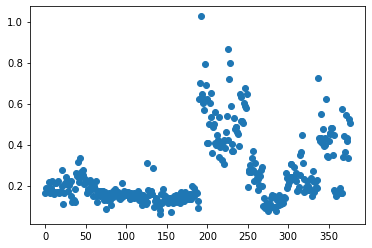

In [5]:
# exploring differences in times
plt.plot(np.arange(0, len(times)), [np.max(t) for t in times], "o")

**Example call from all individuals**

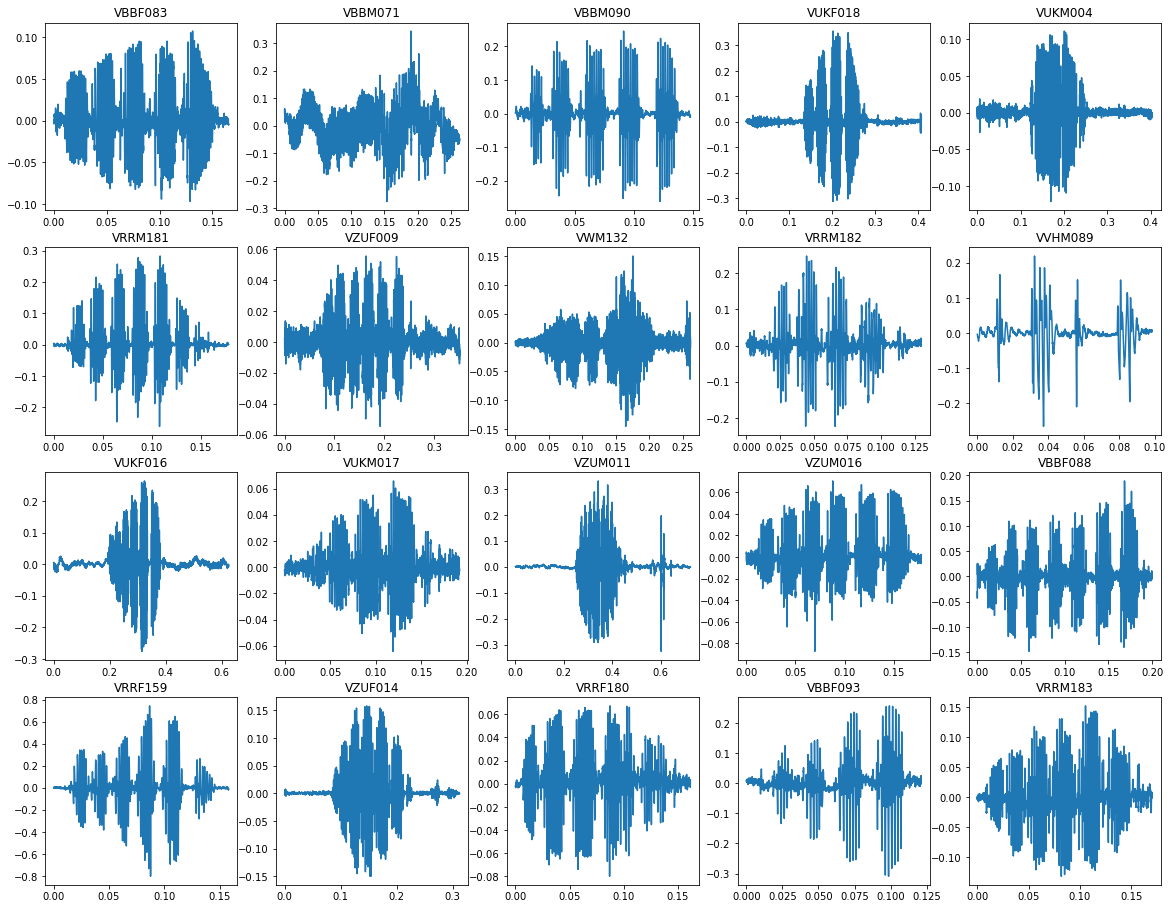

In [36]:
ind_set = set(ind_name)
plt.figure(figsize=(20, 20))

for i, x in enumerate(ind_set):
    j = ind_name.index(x)

    plt.subplot(5, 5, i+1)
    plt.plot(times[j], signals[j])
    plt.title(x)

**Mel Filter Banks**

In [7]:
# params
frame_size = 0.00025
frame_stride = 0.0001
signal_length = len(signals[0]) # testing on the first signal

# calculating window length and hop length
frame_length, frame_step = sr * frame_size, sr * frame_stride
frame_length = int(round(frame_length))
frame_step = int(round(frame_step))

num_windows = int(np.ceil(np.abs(signal_length - frame_length) / frame_step))

params_dict = {
    "frame_size":frame_size,
    "frame_stride":frame_stride,
    "signal_length":signal_length,
    "window_length":frame_length,
    "hop_length":frame_step,
    "n_windows":num_windows
}
params_dict

{'frame_size': 0.00025,
 'frame_stride': 0.0001,
 'signal_length': 7934,
 'window_length': 12,
 'hop_length': 5,
 'n_windows': 1585}

In [8]:
filter_banks = librosa.filters.mel(sr=sr, n_mels=40, n_fft=1024, fmin=100, fmax=5000)
filter_banks.shape

(40, 513)

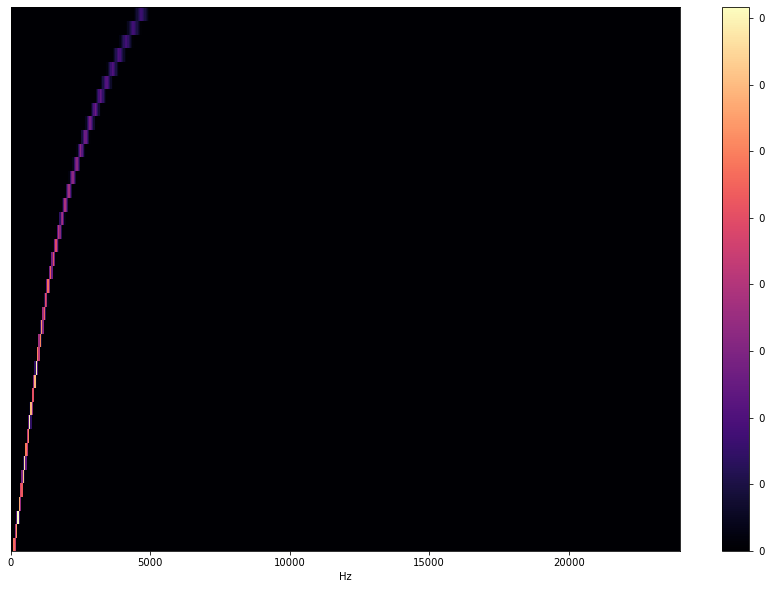

In [25]:
plt.figure(figsize=(15,10))
librosa.display.specshow(filter_banks, sr=sr, x_axis="linear", fmin=100, fmax=5000)
plt.colorbar(format="%2.f")

**Mel Spectrogram**

In [109]:
mel_spec = librosa.feature.melspectrogram(
    y=signals[0],
    sr=sr, 
    hop_length=frame_step, 
    n_mels=40,  
    n_fft=1048,
    fmin=100,
    fmax=4000,
    center=True)
mel_spec.shape

(40, 1587)

In [110]:
log_mel_spec = librosa.power_to_db(mel_spec)
log_mel_spec.shape

(40, 1587)

Text(0.5, 1.0, 'hop_length=5, n_mels=150, fmax=5000, fmin=100, n_fft=1024')

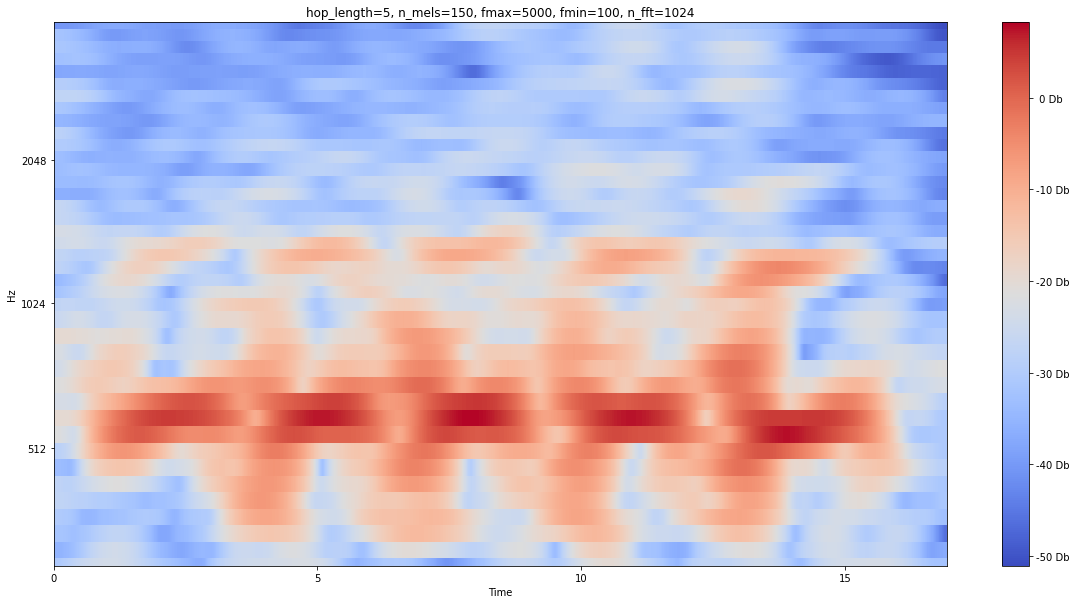

In [111]:
plt.figure(figsize=(20,10))
librosa.display.specshow(log_mel_spec, sr=sr, x_axis="time", y_axis="mel", fmax=4000, fmin=100)
plt.colorbar(format="%2.f Db")
plt.title("hop_length={}, n_mels=150, fmax=5000, fmin=100, n_fft=1024".format(frame_step))

(4, 129)


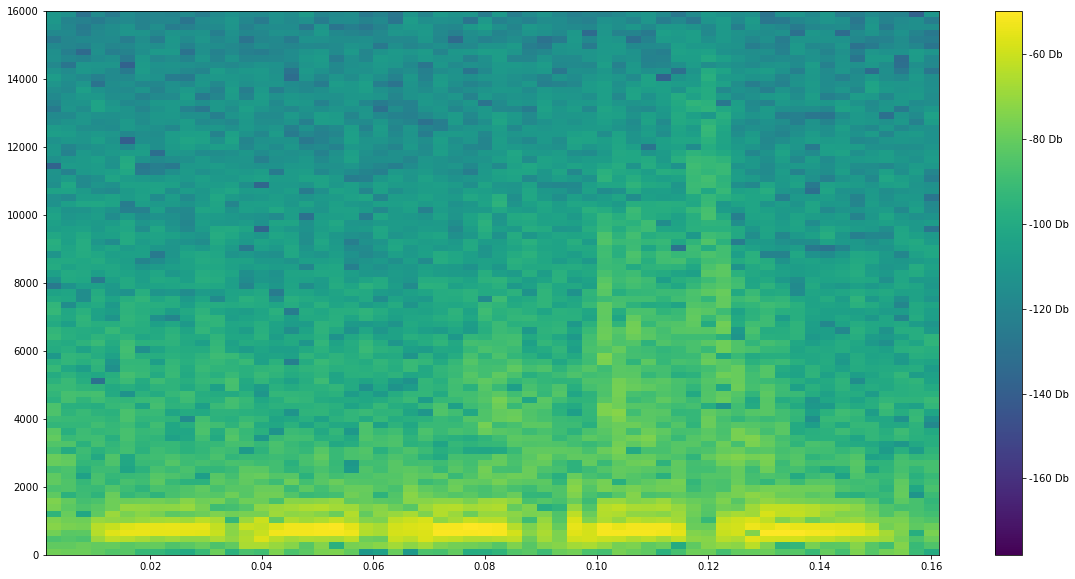

In [62]:
plt.figure(figsize=(20,10))
spgram = plt.specgram(signals[0], Fs=sr)
plt.colorbar(format="%2.f Db")
plt.ylim(0, 16000)
print("({0}, {1})".format(len(spgram), len(spgram[0])))

Text(0.5, 1.0, 'hop_length=4, n_mels=124, fmax=20000, n_fft=1048')

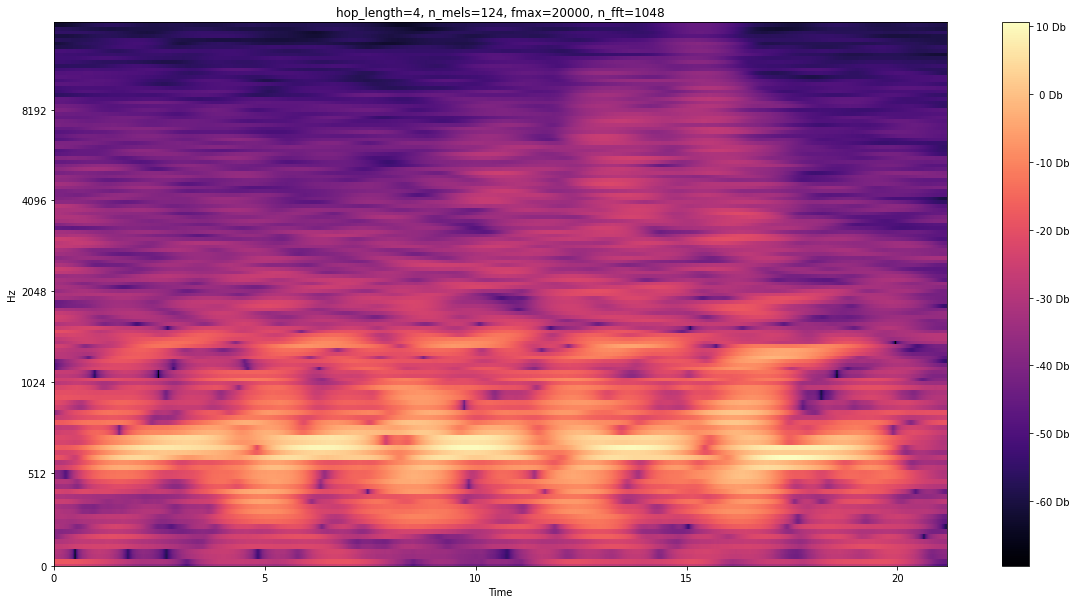

In [63]:
mel_spec_2 = librosa.feature.melspectrogram(y=signals[0], sr=sr, hop_length=4, n_mels=150, fmax=20000, n_fft=1048)
log_mel_spec_2 = librosa.power_to_db(mel_spec_2)
plt.figure(figsize=(20,10))
librosa.display.specshow(log_mel_spec_2, sr=sr, x_axis="time", y_axis="mel")
plt.colorbar(format="%2.f Db")
plt.ylim(0, 16000)
plt.title("hop_length=4, n_mels=124, fmax=20000, n_fft=1048")

Text(0.5, 1.0, 'hop_length=4, n_mels=40, fmax=10000, n_fft=1024')

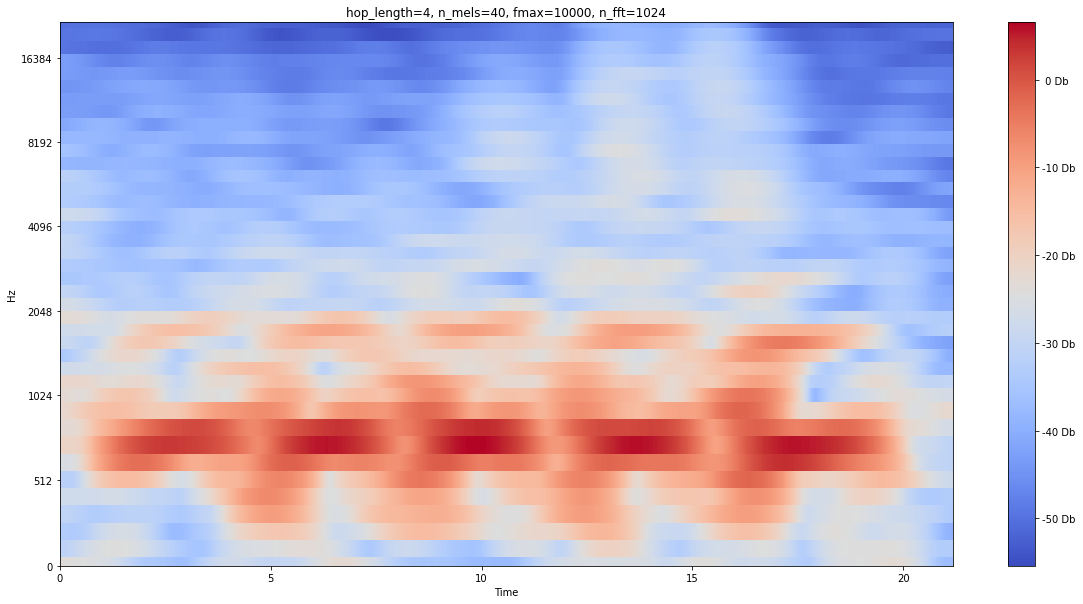

In [81]:
mel_spec_2 = librosa.feature.melspectrogram(
    y=signals[0],
    sr=sr, 
    hop_length=frame_step, 
    n_mels=40,  
    n_fft=1024,
    fmax=10000,
    center=True)

log_mel_spec_2 = librosa.power_to_db(mel_spec_2)

plt.figure(figsize=(20,10))
librosa.display.specshow(log_mel_spec_2, sr=sr, x_axis="time", y_axis="mel")
plt.colorbar(format="%2.f Db")
plt.title("hop_length={}, n_mels=40, fmax=10000, n_fft=1024".format(frame_step))

**Trying a to augment differences in the pixels of the spectrogram**

Text(0.5, 1.0, 'hop_length=4, n_mels=150, fmax=10000, n_fft=1024')

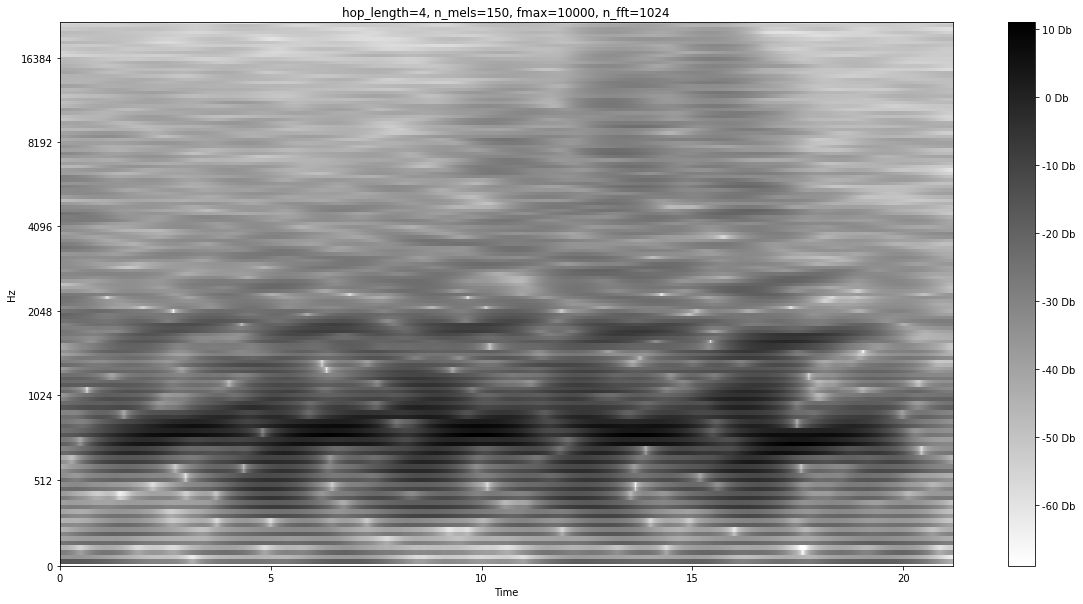

In [82]:
# grayscalinng
plt.figure(figsize=(20,10))
librosa.display.specshow(log_mel_spec, sr=sr, x_axis="time", y_axis="mel", cmap="gray_r")
plt.colorbar(format="%2.f Db")
plt.title("hop_length={}, n_mels=150, fmax=10000, n_fft=1024".format(frame_step))

Text(0.5, 1.0, 'Enhanced differences, hop_length=4, n_mels=150, fmax=10000, n_fft=1024')

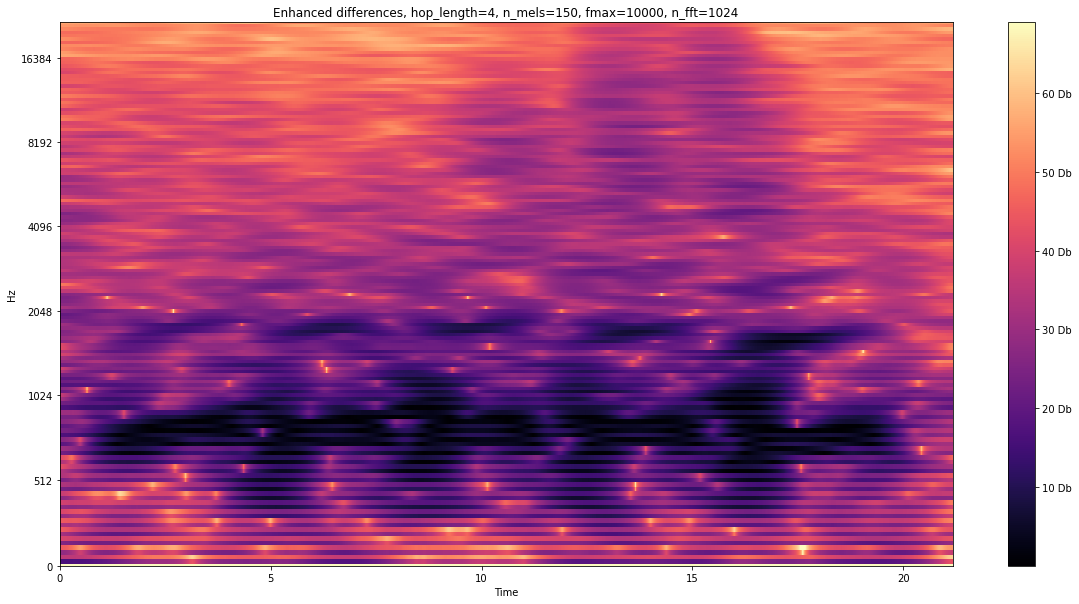

In [83]:
# taking absolute values
log_mel_spec_enhanced = np.abs(log_mel_spec)

plt.figure(figsize=(20,10))
librosa.display.specshow(log_mel_spec_enhanced, sr=sr, x_axis="time", y_axis="mel")
plt.colorbar(format="%2.f Db")
plt.title("Enhanced differences, hop_length={}, n_mels=150, fmax=10000, n_fft=1024".format(frame_step))

C:\Users\adelu\AppData\Local\Temp/ipykernel_1764/236997257.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = (log_mel_spec < -17).astype(np.float)
C:\Users\adelu\AppData\Local\Temp/ipykernel_1764/236997257.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask2 = (log_mel_spec < -10).astype(np.float)


Text(0.5, 1.0, 'enhanced_2 differences, hop_length=4, n_mels=150, fmax=10000, n_fft=1024')

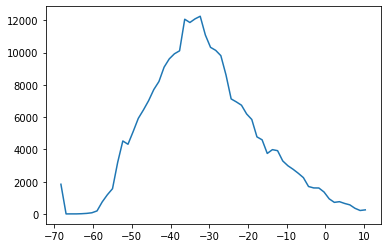

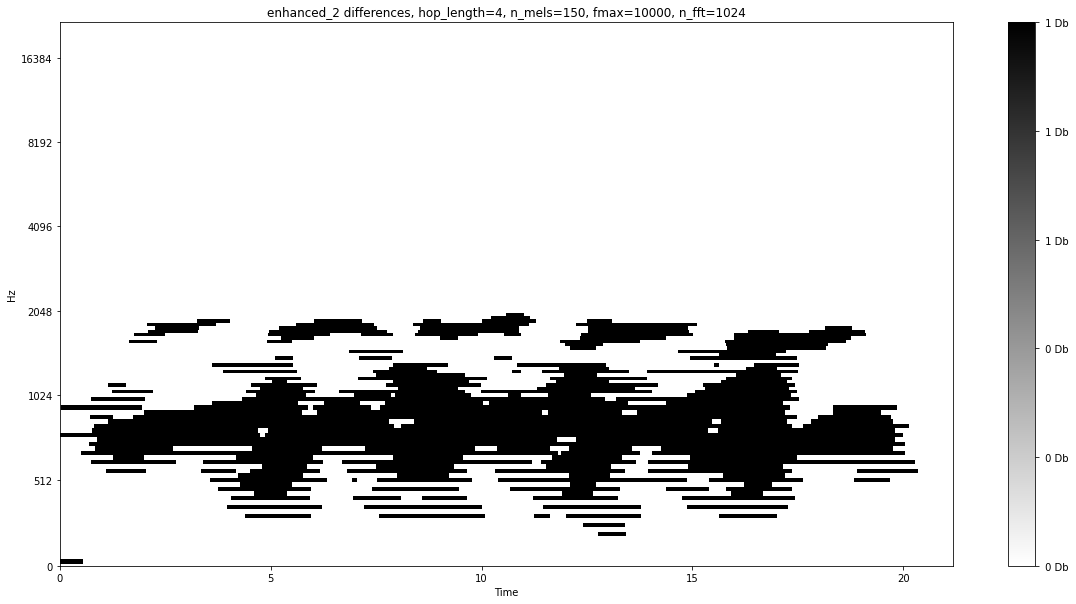

In [84]:
# discretizing
hist, bins = np.histogram(log_mel_spec, bins=60)
bin_centers = 0.5*(bins[:-1] + bins[1:])
plt.plot(bin_centers, hist)

mask = (log_mel_spec < -17).astype(np.float)
mask2 = (log_mel_spec < -10).astype(np.float)

log_mel_spec_enhanced_tmp_1 = np.where(mask, 0, 1)
#log_mel_spec_enhanced_tmp_2 = np.where(mask2, 0, 1)
log_mel_spec_enhanced_2 = log_mel_spec_enhanced_tmp_1
plt.figure(figsize=(20,10))
librosa.display.specshow(log_mel_spec_enhanced_2, sr=sr, x_axis="time", y_axis="mel", cmap="gray_r")
plt.colorbar(format="%2.f Db")
plt.title("enhanced_2 differences, hop_length={}, n_mels=150, fmax=10000, n_fft=1024".format(frame_step))


**Smoothing**

Text(0.5, 1.0, 'smoothened (Gaussian), hop_length=4, n_mels=150, fmax=10000, n_fft=1024')

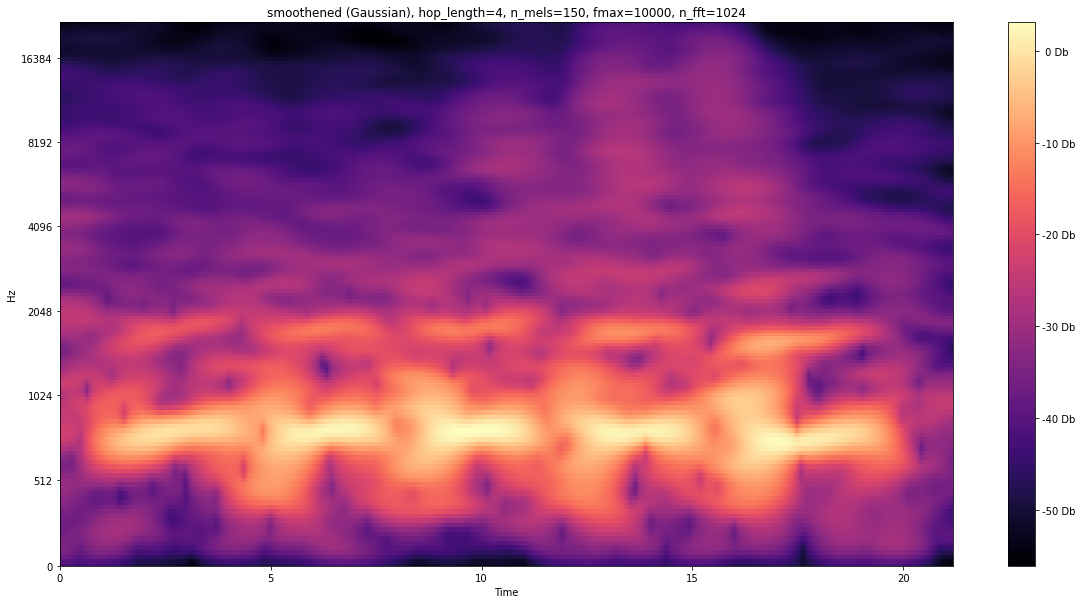

In [85]:
# gaussian filter
smooth_gaus_spec = sc.ndimage.gaussian_filter(log_mel_spec, 2)

plt.figure(figsize=(20,10))
librosa.display.specshow(smooth_gaus_spec, sr=sr, x_axis="time", y_axis="mel")
plt.colorbar(format="%2.f Db")
plt.title("smoothened (Gaussian), hop_length={}, n_mels=150, fmax=10000, n_fft=1024".format(frame_step))

Text(0.5, 1.0, 'smoothened (Uniform), hop_length=4, n_mels=150, fmax=10000, n_fft=1024')

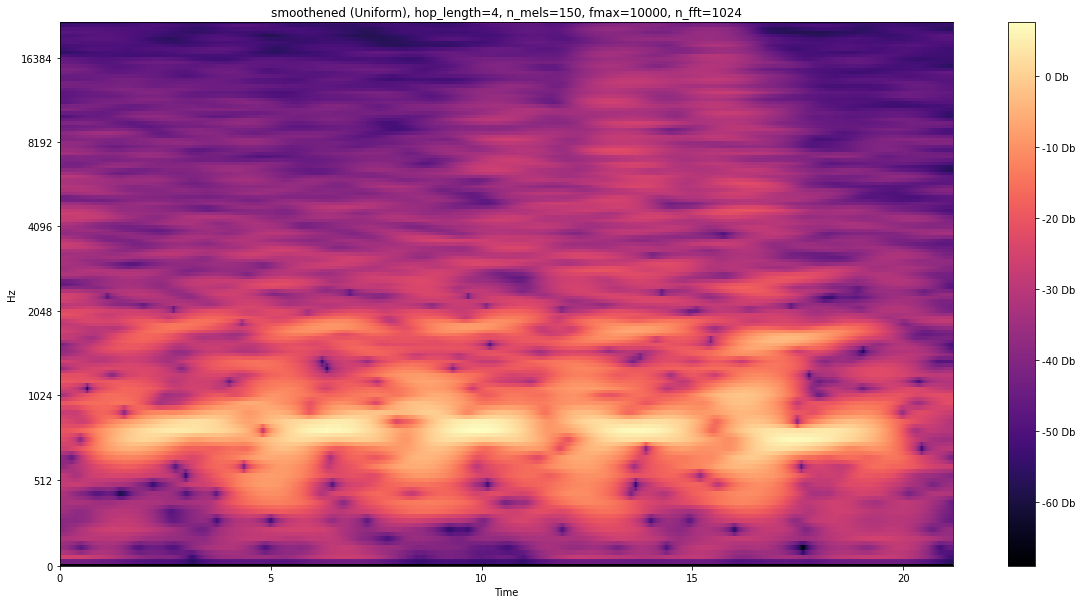

In [86]:
# uniform filter
smooth_uni_spec = sc.ndimage.uniform_filter(log_mel_spec, 2)

plt.figure(figsize=(20,10))
librosa.display.specshow(smooth_uni_spec, sr=sr, x_axis="time", y_axis="mel")
plt.colorbar(format="%2.f Db")
plt.title("smoothened (Uniform), hop_length={}, n_mels=150, fmax=10000, n_fft=1024".format(frame_step))

Text(0.5, 1.0, 'smoothened (Median), hop_length=4, n_mels=150, fmax=10000, n_fft=1024')

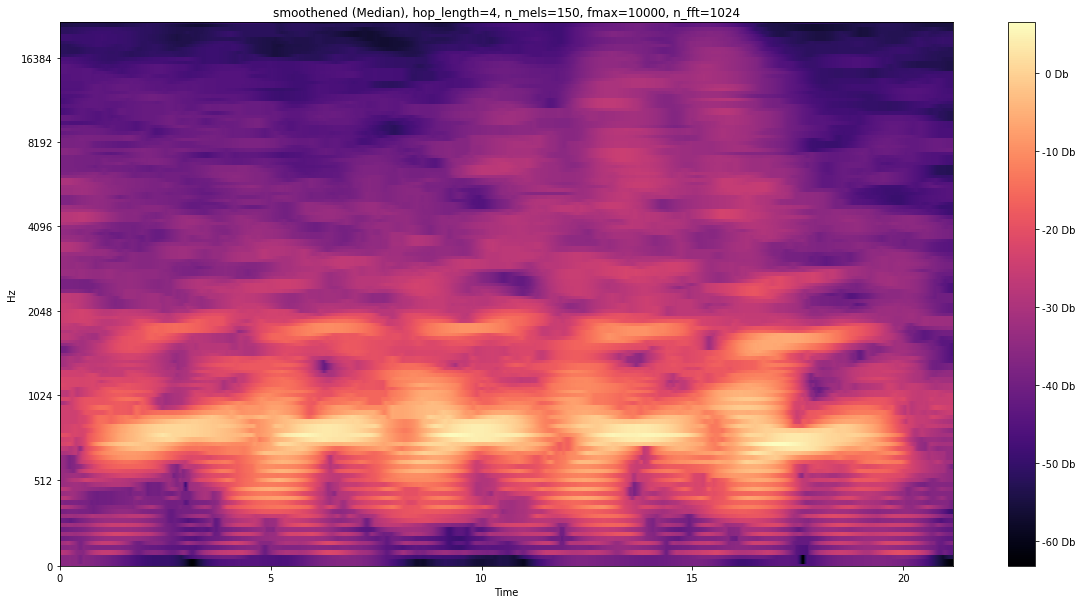

In [87]:
# median filter
smooth_med_spec = sc.ndimage.median_filter(log_mel_spec, 5)

plt.figure(figsize=(20,10))
librosa.display.specshow(smooth_med_spec, sr=sr, x_axis="time", y_axis="mel")
plt.colorbar(format="%2.f Db")
plt.title("smoothened (Median), hop_length={}, n_mels=150, fmax=10000, n_fft=1024".format(frame_step))

Text(0.5, 1.0, 'discrete smoothened (Median), hop_length=4, n_mels=150, fmax=10000, n_fft=1024')

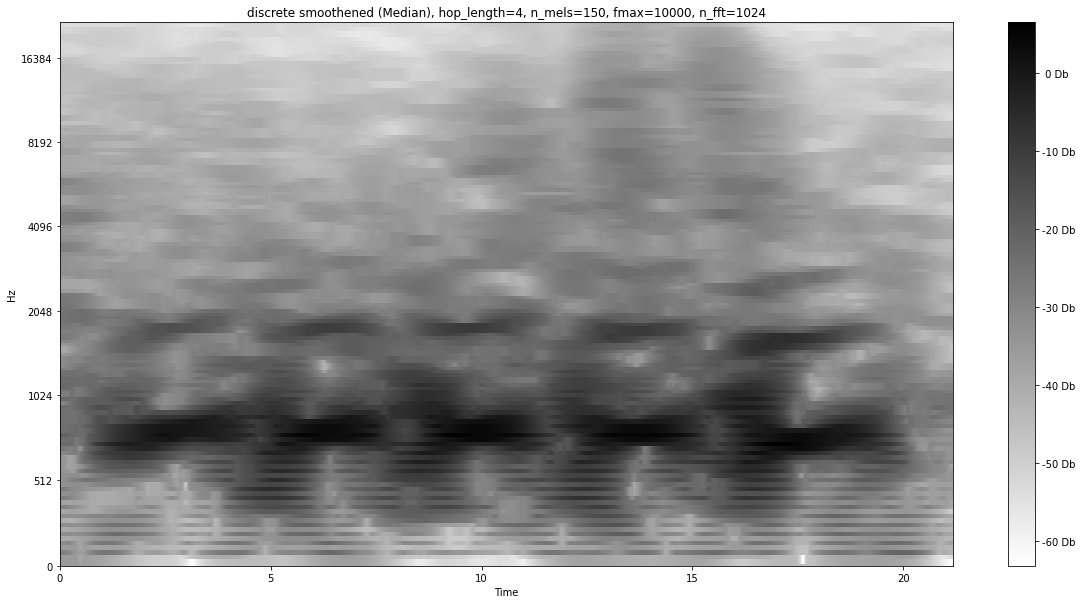

In [88]:
# smoothening the discretized image
disc_uni_spec = sc.ndimage.uniform_filter(log_mel_spec_enhanced_2, 2)

plt.figure(figsize=(20,10))
librosa.display.specshow(smooth_med_spec, sr=sr, x_axis="time", y_axis="mel", cmap="gray_r")
plt.colorbar(format="%2.f Db")
plt.title("discrete smoothened (Median), hop_length={}, n_mels=150, fmax=10000, n_fft=1024".format(frame_step))

Text(0.5, 1.0, 'Uniform, hop_length=4, n_mels=40, fmax=10000, n_fft=1024')

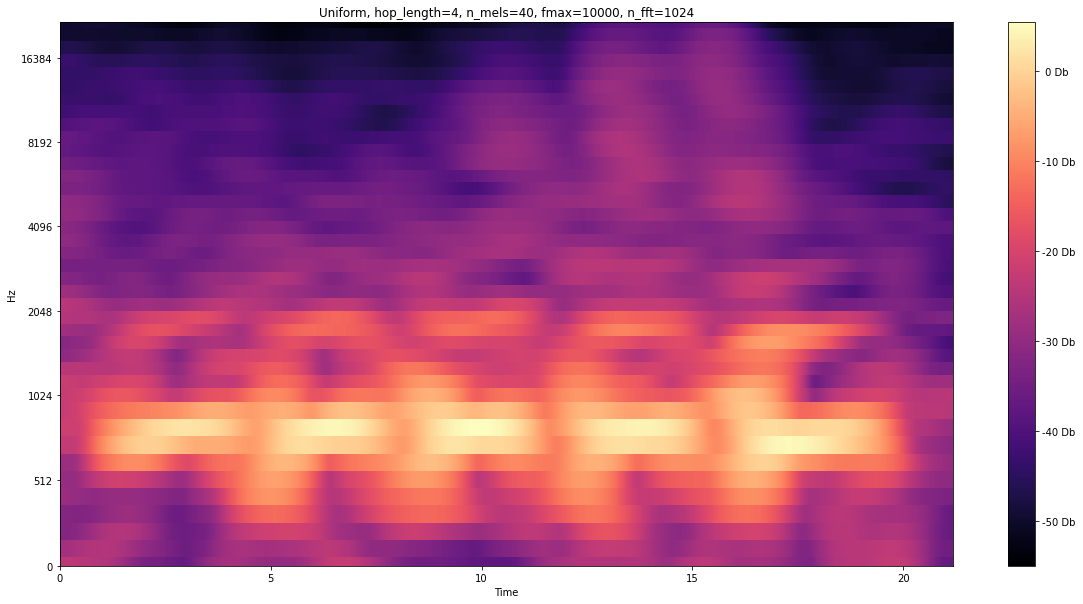

In [89]:
# uniform smoothner on the 40 mel bins
smooth_uni_spec_2 = sc.ndimage.uniform_filter(log_mel_spec_2, 2)

plt.figure(figsize=(20,10))
librosa.display.specshow(smooth_uni_spec_2, sr=sr, x_axis="time", y_axis="mel")
plt.colorbar(format="%2.f Db")
plt.title("Uniform, hop_length={}, n_mels=40, fmax=10000, n_fft=1024".format(frame_step))

**Conclusion**  
- The noise in the spectrogram is probably related to the very short duration of the signal (evident when comparing small image size with a larger one).  
- Best parameter settings:

| param | value |
| --- | --- |
| frame_size | 0.00025 |
| frame_stride | 0.0001 |
| signal_length | 7290 |
| window_length | 11 |
| hop_length | 4 |
| n_windows | 1820 |
| n_mels | 150 |
| fmax | 10000 |
| n_fft | 1024 |

- Best smoother: uniform (order=2)
- Visually best result with gray scale

Text(0.5, 1.0, 'Mel Spectrogram (uniform smoother)\nhop_length=4, n_mels=150, fmax=10000, n_fft=1024')

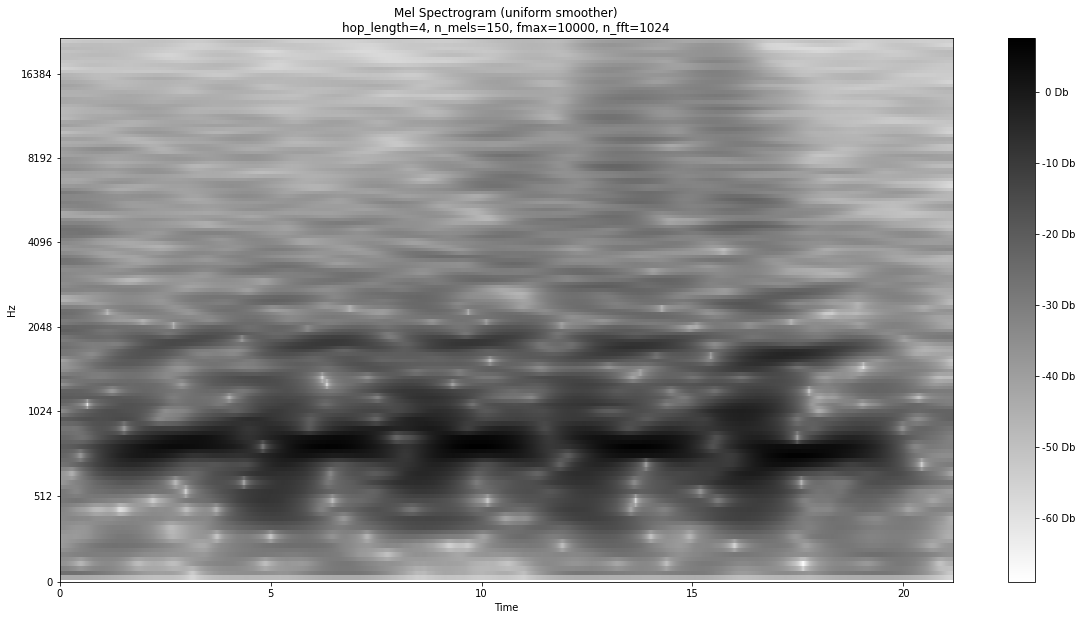

In [90]:
mel_spec = librosa.feature.melspectrogram(
    y=signals[0],
    sr=sr, 
    hop_length=frame_step, 
    n_mels=150,  
    n_fft=1024,
    fmax=10000,
    center=True)

log_mel_spec = librosa.power_to_db(mel_spec)

smooth_log_mel_spec = sc.ndimage.uniform_filter(log_mel_spec, 2)

plt.figure(figsize=(20,10))
librosa.display.specshow(smooth_log_mel_spec, sr=sr, x_axis="time", y_axis="mel", cmap="gray_r")
plt.colorbar(format="%2.f Db")
plt.title(
    "Mel Spectrogram (uniform smoother)" \
    "\nhop_length={}, n_mels=150, fmax=10000, n_fft=1024".format(frame_step)
    )

After talking with Prof. Marie Roch of SDSU the best spectrogram should be the first one unsmoothened.